In [9]:
import os
import numpy as np
from matplotlib import pyplot as mp
import cv2 as cv
from scipy.constants import h, c, k
from scipy import integrate
from jupyterthemes import jtplot

In [10]:
jtplot.reset()
mp.style.use("seaborn")
mp.rcParams["axes.axisbelow"] = True
mp.rcParams["text.usetex"] = True
mp.rcParams["font.family"] = "serif"
mp.rcParams["figure.figsize"] = (16/2, 9/2)
mp.rcParams["figure.dpi"] = 100
mp.rcParams["text.latex.preamble"] = [r"\usepackage{physics}"]

In [72]:
def spec2xyz(wavelength, spectrum, observer):
    XYZ = []
    for i in range(len(observer)):
        integrand = spectrum*observer[i]
        integral = integrate.trapz(integrand, wavelength)
        XYZ.append(integral)
    x, y, z = XYZ/np.sum(XYZ)
    return x, y

def B(l, T):
    c1 = 2*np.pi*h*c*c
    c2 = h*c/k
    return c1/l**5 * 1/(np.exp(c2/l/T) - 1)

def ShoelaceArea(x, y):
    return 1/2 * abs(x@np.roll(y, 1) - y@np.roll(x, 1))

In [73]:
wavelength, xbar, ybar, zbar = np.genfromtxt('cie1964.csv', delimiter=',', unpack=True)

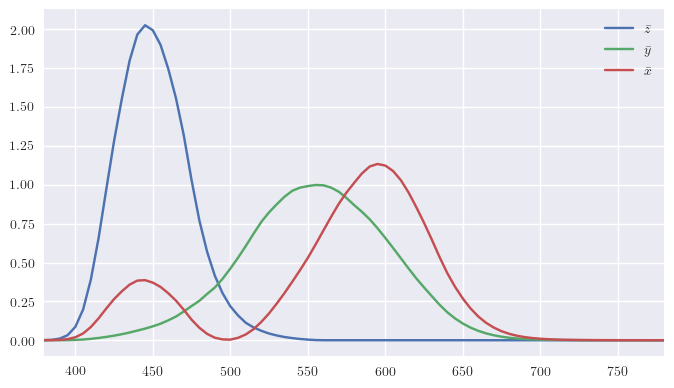

In [74]:
mp.plot(wavelength, zbar,
        wavelength, ybar,
        wavelength, xbar)
mp.legend([r'$\bar{z}$', r'$\bar{y}$', r'$\bar{x}$'])
mp.xlim(wavelength.min(), wavelength.max())
mp.show()

In [75]:
boundx, boundy = [], []
for w in range(380, 781, 10):
    ddelta = np.zeros_like(wavelength)
    ddelta[np.where(wavelength == w)[0]] = 1
    x, y = spec2xyz(wavelength, ddelta, [xbar, ybar, zbar])
    boundx.append(x)
    boundy.append(y)
    
locusx, locusy = [], []
T = np.arange(1000, 10001, 1000)
for t in T:
    bl = B(wavelength * 1e-9, t)
    ba = integrate.trapz(bl, wavelength*1e-9)
    b = bl/ba
    x, y = spec2xyz(wavelength, b, [xbar, ybar, zbar])
    locusx.append(x)
    locusy.append(y)

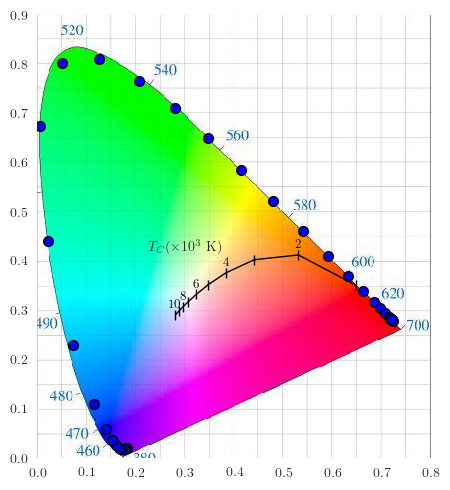

In [89]:
ciexy = mp.imread('ciexy.jpg')
mp.figure(figsize=(5, 5))
mp.imshow(ciexy, extent=(0.0, 0.8, 0.0, 0.9))
mp.plot(boundx, boundy, 'bo', mew=1, mec='k')
mp.plot(locusx, locusy, marker='|', ls='-', color='k', mec='k', mew=1, lw=1)
for i, s in enumerate(T):
    if i%2 == 0:
        continue
    mp.text(locusx[i], locusy[i]+0.02, 
            str(s//1000), 
            fontsize=9, 
            color='k', 
            horizontalalignment='center',
            verticalalignment='center')
mp.text(0.3, 0.425, r'$T_C(\times 10^3 \textrm{ K})$', 
        horizontalalignment='center',
        verticalalignment='center')
mp.grid(0)
mp.tight_layout()
mp.savefig('locus.png', dpi=300, bbox_inches='tight')
mp.show()